In [18]:
import sys
sys.path.append("..")

import numpy as np
import matplotlib.pyplot as plt

# Example configuration and parameters
n_samples = 30000
radius = 0.5  # Radius of the circle where centers are located
num_centers = 4  # Number of centers
angles = np.linspace(0, 2 * np.pi, num_centers, endpoint=False)
means = np.array([[radius * np.cos(angle), radius * np.sin(angle)] for angle in angles])
covariances = [np.array([[0.015, 0], [0, 0.015]]) for _ in range(num_centers)]
priors = [1 / num_centers for _ in range(num_centers)]

In [19]:
# Function to sample from a Gaussian distribution
def sample_gaussian(mean, cov, n):
    return np.random.multivariate_normal(mean, cov, n)

# Initialize an empty array to store the samples
samples = np.zeros((n_samples, 2))

# Randomly choose the Gaussian component for each sample based on the priors
component_choices = np.random.choice(num_centers, size=n_samples, p=priors)

# Generate the samples
for i in range(num_centers):
    n_samples_i = np.sum(component_choices == i)
    samples[component_choices == i] = sample_gaussian(means[i], covariances[i], n_samples_i)

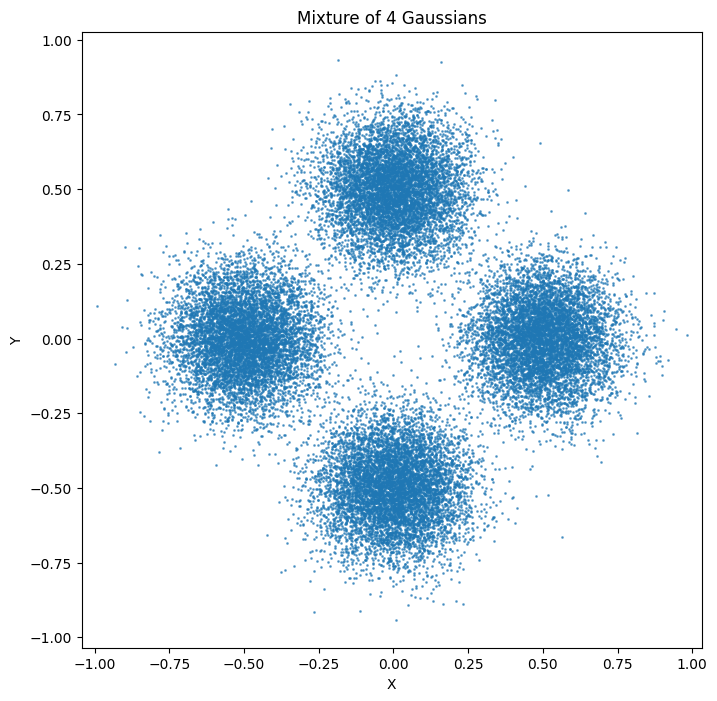

In [20]:

# Plot the samples
plt.figure(figsize=(8, 8))
plt.scatter(samples[:, 0], samples[:, 1], s=1, alpha=0.6)
plt.title(f"Mixture of {num_centers} Gaussians")
plt.xlabel("X")
plt.ylabel("Y")
plt.axis('equal')
plt.show()